# HW1 Extra Credit - Exercises from Hogg et al 2010

## Chapter 1

### Problem 1


Fitting a linear model to a dataset with uncertainties

In [1]:
%matplotlib inline
import numpy as np
from numpy import linalg as la
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# Copying Table 1 by hand b/c there isn't a machine-readable version :( 

df = pd.DataFrame(np.array([[201,592,61,9,-0.84],
                            [244,401,25,4,0.31],
                            [47,583,38,11,0.64],
                            [287,402,15,7,-0.27],
                            [203,495,21,5,-0.33],
                            [58,173,15,9,0.67],
                            [210,479,27,4,-0.02],
                            [202,504,14,4,-0.05],
                            [198,510,30,11,-0.84],
                            [158,416,16,7,-0.69],
                            [165,393,14,5,0.30],
                            [201,442,25,5,-0.46],
                            [157,317,52,5,-0.03],
                            [131,311,16,6,0.50],
                            [166,400,34,6,0.73],
                            [160,337,31,5,-0.52],
                            [186,423,42,9,0.90],
                            [125,334,26,8,0.40],
                            [218,533,16,6,-0.78],
                            [146,344,22,5,-0.56]
                            ]),index=np.arange(1,21),columns=('x','y','s_x','s_y','rho_xy'))

In [3]:
df.head()

,x,y,s_x,s_y,rho_xy
1,201.0,592.0,61.0,9.0,-0.84
2,244.0,401.0,25.0,4.0,0.31
3,47.0,583.0,38.0,11.0,0.64
4,287.0,402.0,15.0,7.0,-0.27
5,203.0,495.0,21.0,5.0,-0.33


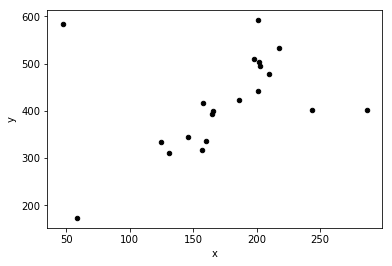

In [5]:
df.plot.scatter(x='x', y='y', c='k')

In [5]:
# Create separate arrays with outliers removed
x1 = df['x'][4::]
y1 = df['y'][4::]

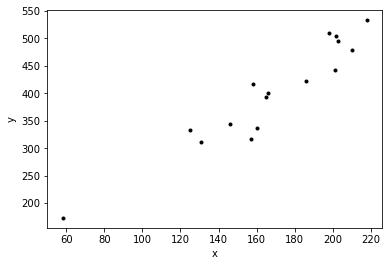

In [6]:
plt.scatter(x1, y1, c='k', marker='.')
plt.xlabel('x')
plt.ylabel('y')

In [7]:
Y = np.array(y1)
A = np.zeros((len(x1),2))
for i in range(len(x1)):
    A[i][0] = 1
    A[i][1] = x1[i+5]

C = np.diag(df['s_y'][4::] ** 2)

In [8]:
X1 = la.inv(np.matmul(np.matmul(A.transpose(),la.inv(C)), A))
X2 = np.matmul(np.matmul(A.transpose(),la.inv(C)), Y)
X = np.matmul(X1,X2)
print(X)

[3.81861706 2.33013017]


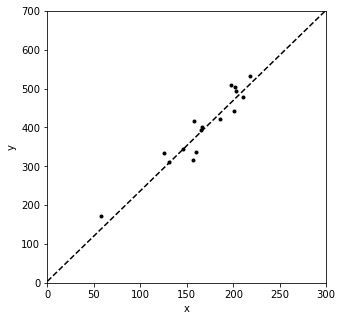

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(x1, y1, c='k', marker='.')
dom = np.linspace(0,300)
plt.plot(dom,X[1]*dom + X[0], c='k', ls='--')
plt.xlim(0,300)
plt.ylim(0,700)
plt.xlabel('x')
plt.ylabel('y')

### Problem 2

Basically a repeat of problem 1 but with the outliers added back in

In [11]:
x = df['x']
y = df['y']

In [12]:
Y = np.array(y)
A = np.zeros((len(x),2))
for i in range(len(x)):
    A[i][0] = 1
    A[i][1] = x[i+1]
C = np.diag(df['s_y'] ** 2)

In [13]:
X1 = la.inv(np.matmul(np.matmul(A.transpose(),la.inv(C)), A))
X2 = np.matmul(np.matmul(A.transpose(),la.inv(C)), Y)
X = np.matmul(X1,X2)
print(X)

[250.08215515   0.90783146]


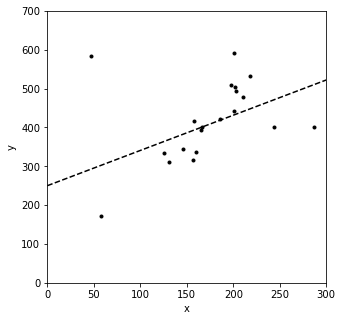

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(x, y, c='k', marker='.')
dom = np.linspace(0,300)
plt.plot(dom,X[1]*dom + X[0], c='k', ls='--')
plt.xlim(0,300)
plt.ylim(0,700)
plt.xlabel('x')
plt.ylabel('y')

### Problem 3

Fitting a nonlinear model to the dataset w/ outliers

In [15]:
Y = np.array(y1)
A = np.zeros((len(x1),3))
for i in range(len(x1)):
    A[i][0] = 1
    A[i][1] = x[i+5]
    A[i][2] = x[i+5] ** 2
C = np.diag(df['s_y'][4::] ** 2)

In [16]:
X1 = la.inv(np.matmul(np.matmul(A.transpose(),la.inv(C)), A))
X2 = np.matmul(np.matmul(A.transpose(),la.inv(C)), Y)
X = np.matmul(X1,X2)
print(X)

[1.21837764e+02 7.55108148e-01 4.96230052e-03]


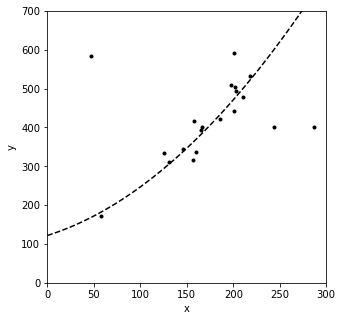

In [17]:
plt.figure(figsize=(5,5))
plt.scatter(x, y, c='k', marker='.')
dom = np.linspace(0,300)
plt.plot(dom,X[2]*dom**2 + X[1]*dom + X[0], c='k', ls='--')
plt.xlim(0,300)
plt.ylim(0,700)
plt.xlabel('x')
plt.ylabel('y')